In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram, circuit_drawer
import numpy as np
import time


In [2]:
IBMQ.save_account('e306ef2b96396af97bb83db62cc782278717c308b4cf0a8610303c32811d887a5c0f7ceead3aa39881040dcc00a194c4e0516d6c980cf65b56e3a54d6dd54d91')


/var/folders/cm/99hsxg112vq5yxgw7xp0qx640000gn/T/ipykernel_44580/2508646452.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('e306ef2b96396af97bb83db62cc782278717c308b4cf0a8610303c32811d887a5c0f7ceead3aa39881040dcc00a194c4e0516d6c980cf65b56e3a54d6dd54d91')
/var/folders/cm/99hsxg112vq5yxgw7xp0qx640000gn/T/ipykernel_44580/2508646452.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github

In [3]:
start_time = time.time()

In [4]:
secret_key= ''.join([str(np.random.randint(2)) for _ in range(3)])

In [5]:
qc=QuantumCircuit(3,3)


In [6]:
# preparing a bell pair
qc.h(1)             # Apply a Hadamard gate to qubit 1
qc.cx(1, 2)         # Apply a CNOT gate with qubit 1 as control and qubit 2 as target
qc.barrier() # Barrier to separate steps visually
qc.draw()

░ 
q_0: ───────────░─
     ┌───┐      ░ 
q_1: ┤ H ├──■───░─
     └───┘┌─┴─┐ ░ 
q_2: ─────┤ X ├─░─
          └───┘ ░ 
c: 3/═════════════

In [7]:
for i, bit in enumerate(secret_key):
    if bit == '1':
        qc.x(0)         # Apply X gate to qubit 0 if the bit in Alice's secret key is 1
    qc.h(0)             # Apply a Hadamard gate to qubit 0
    qc.cx(0, 1)         # Apply a CNOT gate with qubit 0 as control and qubit 1 as target
    qc.barrier()        

/Users/ayonsomaddar/Chandigarh University/Projects/Quantum_Info/Quantum-Leap/myvenv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


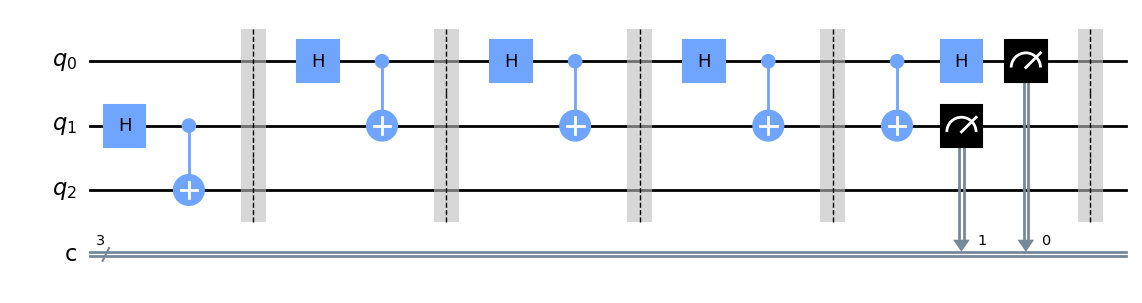

In [8]:
#Bell measurement
qc.cx(0,1)
qc.h(0) 
qc.measure([0, 1], [0, 1]) 
qc.barrier()
qc.draw(output='mpl')



In [9]:
# Corrections based on measure.
for i, bit in enumerate(secret_key):
    if bit == '1':
        qc.z(2)         # Apply Z gate to qubit 2 if the bit in Alice's secret key is 1
    qc.x(2).c_if(1, 1) # Apply X gate to qubit 2 if classical bit 1 is 1
    qc.z(2).c_if(0, 1) # Apply Z gate to qubit 2 if classical bit 0 is 1
    qc.measure(2, 2)

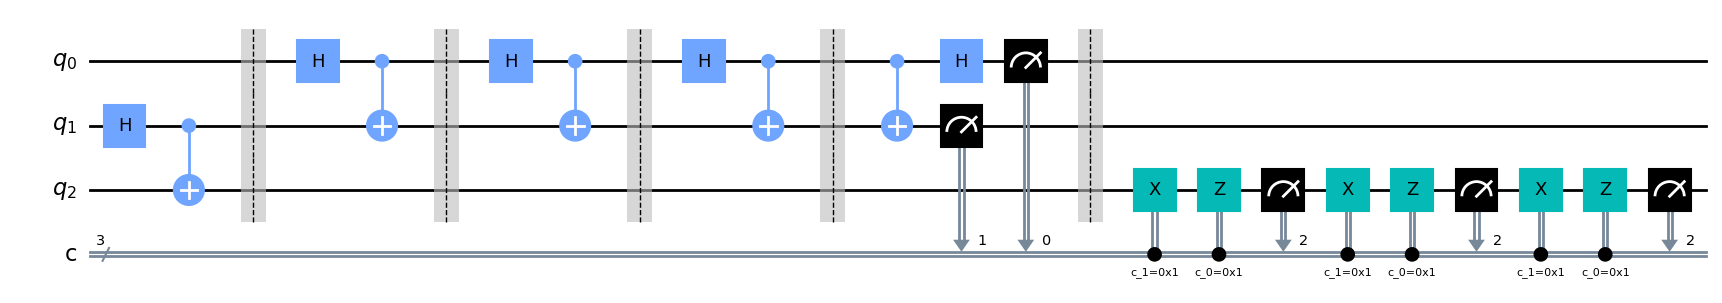

In [10]:
qc.draw(output='mpl')


In [11]:
simulator = Aer.get_backend('qasm_simulator')

/var/folders/cm/99hsxg112vq5yxgw7xp0qx640000gn/T/ipykernel_44580/683745692.py:1: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('qasm_simulator')


In [12]:
result = execute(qc, backend=simulator, shots=1024).result()

/var/folders/cm/99hsxg112vq5yxgw7xp0qx640000gn/T/ipykernel_44580/998274285.py:1: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(qc, backend=simulator, shots=1024).result()


In [13]:
counts = result.get_counts(qc)

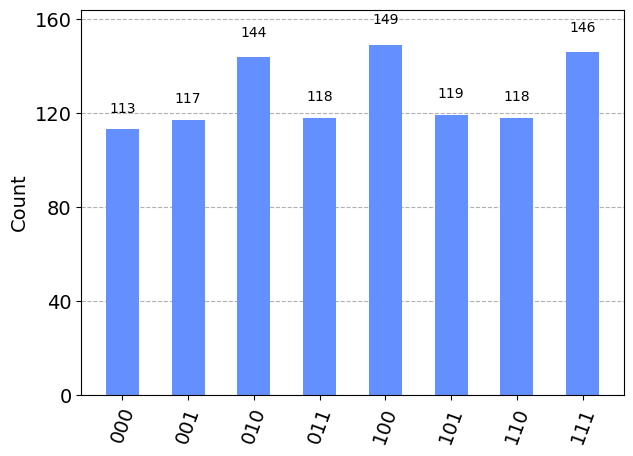

In [14]:
plot_histogram(counts)

/Users/ayonsomaddar/Chandigarh University/Projects/Quantum_Info/Quantum-Leap/myvenv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: UserWarning: Style JSON file 'mpl.json' not found in any of these locations: /Users/ayonsomaddar/Chandigarh University/Projects/Quantum_Info/Quantum-Leap/myvenv/lib/python3.10/site-packages/qiskit/visualization/circuit/styles/mpl.json, mpl.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


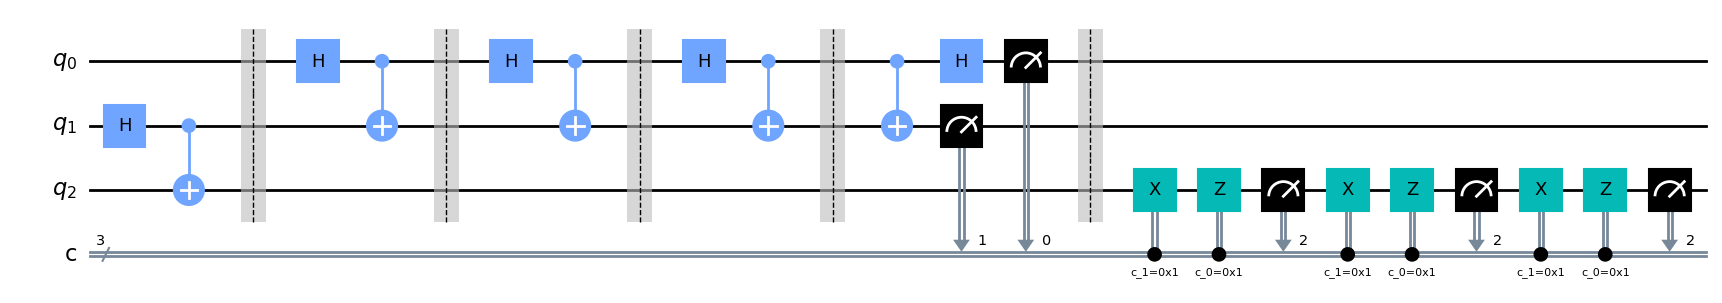

In [15]:
circuit_drawer(qc, style='mpl', output='mpl', filename='teleportation_circuit.png')


In [16]:
#in IBM cloud
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [17]:
provider=IBMQ.get_provider(hub='ibm-q')

In [18]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
print(provider.backends())
backend = provider.get_backend('ibmq_qasm_simulator')

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [19]:
print([backend.name() for backend in IBMQ.providers()[0].backends()])


['ibmq_qasm_simulator', 'simulator_statevector', 'simulator_mps', 'simulator_extended_stabilizer', 'simulator_stabilizer', 'ibm_brisbane', 'ibm_kyoto', 'ibm_osaka']


In [20]:
job=execute(qc, backend=backend)

/var/folders/cm/99hsxg112vq5yxgw7xp0qx640000gn/T/ipykernel_44580/676949818.py:1: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job=execute(qc, backend=backend)


In [21]:
result=job.result()

In [22]:
end_time = time.time()

    # Calculate execution time
execution_time = end_time - start_time
print(execution_time)

39.29576396942139


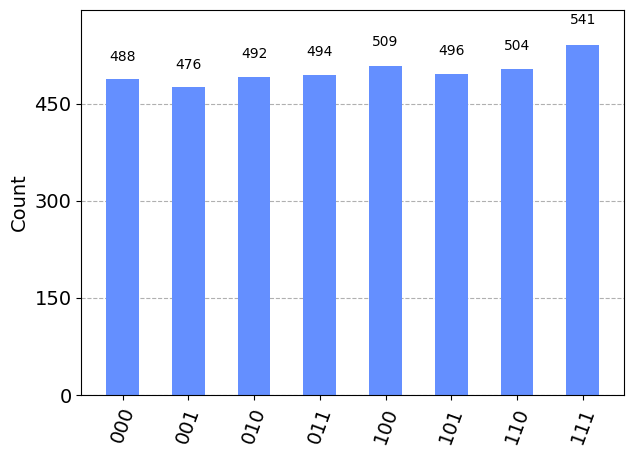

In [23]:
plot_histogram(result.get_counts(qc))

In [24]:
def calculate_qber(counts, total_shots):
    # Calculate Quantum Bit Error Rate (QBER)
    total_errors = counts.get('01', 0) + counts.get('10', 0)
    qber = total_errors / total_shots
    return qber

def calculate_key_generation_rate(total_shots, execution_time):
    # Calculate Key Generation Rate
    key_generation_rate = total_shots / execution_time
    return key_generation_rate

def calculate_protocol_overhead(qc):
    # Calculate Protocol Overhead
    quantum_circuit_depth = qc.depth()
    classical_communication_overhead = 0  # Placeholder for now
    return quantum_circuit_depth, classical_communication_overhead

def evaluate_robustness():
    # Evaluate Robustness Metrics
    error_correction_efficiency = 0.95  # Placeholder for now
    adversarial_resilience = 0.90  # Placeholder for now
    return error_correction_efficiency, adversarial_resilience


In [25]:
qber = calculate_qber(counts, total_shots=1024)
key_generation_rate = calculate_key_generation_rate(total_shots=1024, execution_time=execution_time)

quantum_circuit_depth, classical_communication_overhead = calculate_protocol_overhead(qc)

error_correction_efficiency, adversarial_resilience = evaluate_robustness()


In [27]:
print("Quantum Bit Error Rate (QBER):", qber)
print("Key Generation Rate:", key_generation_rate)
print("Quantum Circuit Depth:", quantum_circuit_depth)
print("Classical Communication Overhead:", classical_communication_overhead) 
print("Error Correction Efficiency:", error_correction_efficiency)
print("Adversarial Resilience:", adversarial_resilience)

Quantum Bit Error Rate (QBER): 0.0
Key Generation Rate: 26.05878844337628
Quantum Circuit Depth: 20
Classical Communication Overhead: 0
Error Correction Efficiency: 0.95
Adversarial Resilience: 0.9
